# Régression Régularisées : LASSO

0. Importez les librairies usuelles 

In [1]:
import pandas as pd

1. Chargez les données grâce à la commande suivante :

```
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
```

2. Créer un dataframe contenant les variables explicatives et un contenant uniquement la variable cible (target)

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

y = pd.DataFrame(cancer.get("target"), columns=["cancer"])

display(cancer_df.head())

display(y.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,cancer
0,0
1,0
2,0
3,0
4,0


3. Séparer les données en une base d’apprentissage et une base de test

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(cancer_df, y, test_size=0.3, random_state=0)
print("...Done.")
print()

sc = StandardScaler()
sc_fit = sc.fit(X_train)
X_train = sc_fit.transform(X_train)
X_test = sc_fit.transform(X_test)

Dividing into train and test sets...
...Done.



4. Générez un modèle de régression linéaire, un modèle lasso ou alpha vaut 1, un autre ou alpha = 0.01 et un dernier où alpha = 0.0001

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

models = {"linear" : LinearRegression(), 
          "lasso 1": Lasso(alpha = 1), 
          "lasso 0.01": Lasso(alpha = 0.01), 
          "lasso 0.0001": Lasso(alpha = 0.0001)}

5. Entraînez ces modèles

In [22]:
for _, model in models.items():
    model.fit(X_train, y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9366427230567265, tolerance: 0.009321859296482413
  model = cd_fast.enet_coordinate_descent(


6. Produisez les scores de performance des quatres modèles

In [23]:
for name, model in models.items():
    print(f"Score {name}, Train score : {model.score(X_train, y_train)}, Test score : {model.score(X_test, y_test)}") 

Score linear, Train score : 0.7811858948400785, Test score : 0.7318931971474478
Score lasso 1, Train score : 0.0, Test score : -0.00015218771531766428
Score lasso 0.01, Train score : 0.7338706928043132, Test score : 0.7197404831681578
Score lasso 0.0001, Train score : 0.7806202706799166, Test score : 0.7334971145677317


In [25]:
from sklearn.metrics import r2_score, mean_squared_error

for name, model in models.items():
    print(f"Score {name}, Train mse : {mean_squared_error(y_train, model.predict(X_train))}, "
          f"Test mse : {mean_squared_error(y_test, model.predict(X_test))}") 

Score linear, Train mse : 0.05125010804991195, Test mse : 0.062384962436604956
Score lasso 1, Train mse : 0.23421757026337728, Test mse : 0.2327223927093814
Score lasso 0.01, Train mse : 0.0623321597072497, Test mse : 0.06521274075865581
Score lasso 0.0001, Train mse : 0.05138258716638732, Test mse : 0.062011751734932244


7. Comparez les coefficients des quatres modèles, quelles sont vos conclusions ?

In [28]:
coefs = {name: model.coef_[0] for name, model in models.items()}
abs_coef = {name + " abs": abs(model.coef_[0]) for name, model in models.items()}
df_coefs = pd.DataFrame(index=cancer_df.columns, data={**coefs, **abs_coef})
df_coefs.head()

,linear,lasso 1,lasso 0.01,lasso 0.0001,linear abs,lasso 1 abs,lasso 0.01 abs,lasso 0.0001 abs
mean radius,0.710329,-0.0,-0.0,0.049438,0.710329,0.0,0.0,0.049438
mean texture,-0.031634,-0.0,-0.0,0.049438,0.031634,0.0,0.0,0.049438
mean perimeter,-0.587823,-0.0,-0.0,0.049438,0.587823,0.0,0.0,0.049438
mean area,-0.021247,-0.0,-0.0,0.049438,0.021247,0.0,0.0,0.049438
mean smoothness,-0.000278,-0.0,-0.0,0.049438,0.000278,0.0,0.0,0.049438


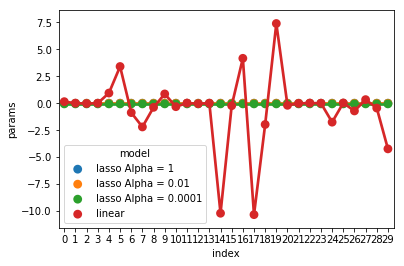